<a href="https://colab.research.google.com/github/TomoharuKurosu/Tomoaharu_Kurosu_2023/blob/main/week12_Transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 20 - Transformer Networks

[![View notebook on Github](https://img.shields.io/static/v1.svg?logo=github&label=Repo&message=View%20On%20Github&color=lightgrey)](https://github.com/avakanski/Fall-2024-Applied-Data-Science-with-Python/blob/main/docs/Lectures/Theme_3-Model_Engineering/Lecture_20-Transformer_Networks/Lecture_20-Transformer_Networks.ipynb)
[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/avakanski/Fall-2024-Applied-Data-Science-with-Python/blob/main/docs/Lectures/Theme_3-Model_Engineering/Lecture_20-Transformer_Networks/Lecture_20-Transformer_Networks.ipynb)

<a id='top'></a>

---

# 目次

* [12.1 トランスフォーマーの概要](#12.1-introduction-to-transformers)
* [12.2 自己注意機構](#12.2-self-attention-mechanism)
* [12.3 マルチヘッド注意機構](#12.3-multi-head-attention)
* [12.4 エンコーダーブロック](#12.4-encoder-block)
* [12.5 位置エンコーディング](#12.5-positional-encoding)
* [12.6 分類問題へのトランスフォーマーモデルの応用](#12.6-using-a-transformer-model-for-classification)
* [12.7 デコーダーサブネットワーク](#12.7-decoder-sub-network)
* [12.8 ビジョントランスフォーマー](#12.8-vision-transformers)
---

## 12.1 Transformers入門 <a name='12.1-introduction-to-transformers'></a>

# トランスフォーマー（Transformer）とは

* トランスフォーマーニューラルネットワーク（Transformer Neural Networks）、略してトランスフォーマー（Transformers）
* [“Attention is all you need”](https://arxiv.org/abs/1706.03762).
* 2017年に登場した革新的なニューラルネットワーク
* 核となる技術：注意機構（attention mechanism）

# 自然言語処理での影響

* 従来：再帰型ニューラルネットワーク（RNN）
* 現在：トランスフォーマーが完全に置き換え
* 全ての大規模言語モデル（LLM）で採用

# 応用分野

* 画像処理（image processing）
* 動画処理（video processing）
* DNA解析（DNA sequence prediction）
* 時系列分析（time-series analysis）
* 強化学習（reinforcement learning）

# 現状

* 機械学習分野で最重要のアーキテクチャ
* 多くの分野で従来モデルを性能で上回る
---

## 2. 自己注意機構（Self-attention） <a name='20.2-self-attention-mechanism'></a>

# 自己注意機構（Self-attention）とは

* ニューラルネットワークにおける重要な予測メカニズム
* データの中で重要な部分に「注目」する仕組み

# 自然言語処理での働き

* 文章中の単語間の関係性を理解
* クエリワード（query word）に対する重要度を計算
* キーワード（key words）との関連性を数値化

# 例：代名詞「it」の理解

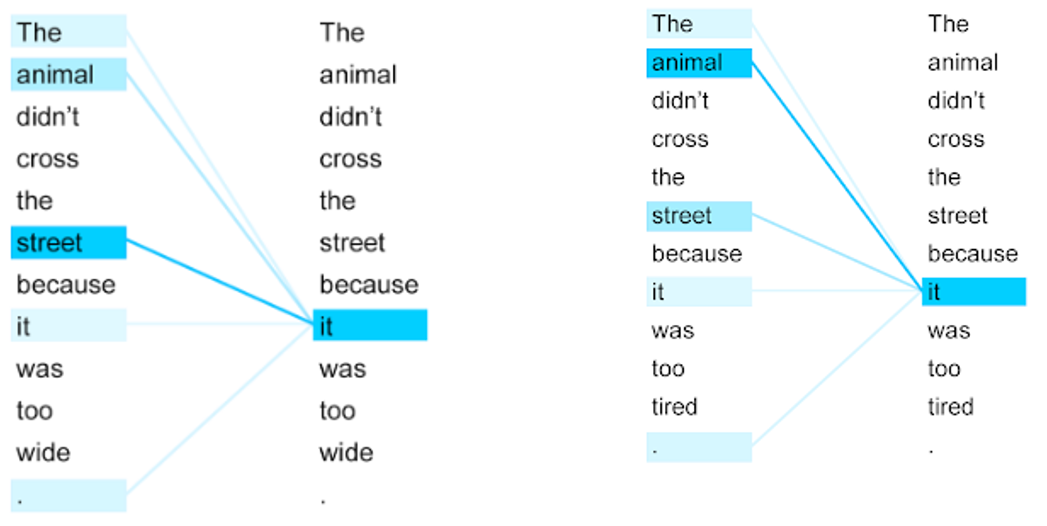

(a) 左の文：
* "it" → "street" を指す
* 主な注目先：street
* 弱い関連：The, animal

(b) 右の文：
* "it" → "animal" を指す
* 主な注目先：animal

# 視覚的な表現方法

* 文脈に応じて関連性が変化
* 線の太さ：関連性の強さ
* 青色の濃さ：注意スコア（attention score）
* より太く濃い線 = より強い関連性

# 特徴

* 従来のNLPでは難しかった文脈理解が可能
* 文章中の全ての単語間の関係を同時に分析
* 文脈に応じて動的に重要度を変更
---

# 単語間の注意スコア（attention score）計算

* 各単語を文中の他の全ての単語と比較
* 注意スコアを計算し、関連性を数値化
  - 全単語ペアで網羅的に計算
  - スコアは単語間の関連性を数値化

* 注意スコア（attention score）
  * Q：クエリワード（Query word）
  * K：キーワード（Key word）
  * 内積（dot product）を使用：　attention score = $Q \cdot K$

# 例

* "How are glacier caves formed"
* 「caves」という単語の場合：
  * 最も高いスコア：
    * "glacier"（氷河）
    * "formed"（形成された）
  * これにより「洞窟」が「氷河によって形成された」という
    文脈を理解

# 特徴

* 文脈に基づく重要度を自動的に特定
* 文の意味理解に重要

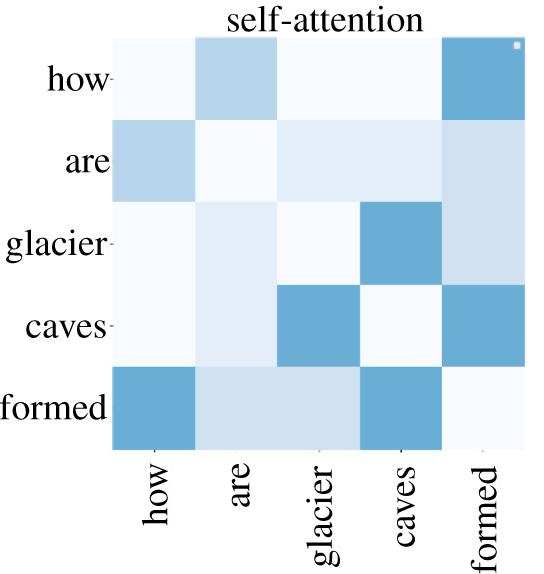

---
# 単語の表現方法

* 単語埋め込み（word embeddings）を使用
  * 各単語を固定長のベクトルに変換
  * 例：「cat」→ [0.2, 0.5, -0.1, 0.8]

# 埋め込みの特徴

* 意味が近い単語は、ベクトル空間でも近い位置に配置
  * 例：「king」と「queen」
  * 例：「cat」と「dog」
* テキストシーケンス全体を扱える
  * 1文の場合
  * 複数文の場合

# 注意スコアの計算

* 手順：
  1. 各単語を埋め込みベクトルに変換
  2. 単語ペアごとに内積を計算
  * 内積が高い = 意味的な関連性が強い

# 重要なポイント

* 意味的類似性を数学的に表現
* ベクトル演算で単語間の関係を計算可能
* 文脈理解の基礎となる技術
---


# 注意スコアの計算プロセス

$$a_{ij} = softmax(\frac{Q_i\cdot K_j}{\sqrt d})$$


# 計算の流れ

1. 内積計算：$Q_i\cdot K_j$

2. スケーリング処理：
   * $\frac{Q_i\cdot K_j}{\sqrt d}$
   * d：埋め込みベクトルの次元数
   * 目的：勾配の流れを改善

3. 正規化（softmax関数）：
   * 結果を[0,1]の範囲に変換
   * 全スコアの合計が1になる

# 実装上の詳細

* 埋め込みベクトルの次元数（d）
  * 大規模言語モデル（LLM）での一般的な範囲
  * 最小：768次元
  * 最大：4,096次元

# 重要なポイント

* スケーリング（$\sqrt d$）の役割
  * 勾配消失問題を防ぐ
  * モデルの学習を安定化
* 正規化により解釈可能なスコアを生成

---

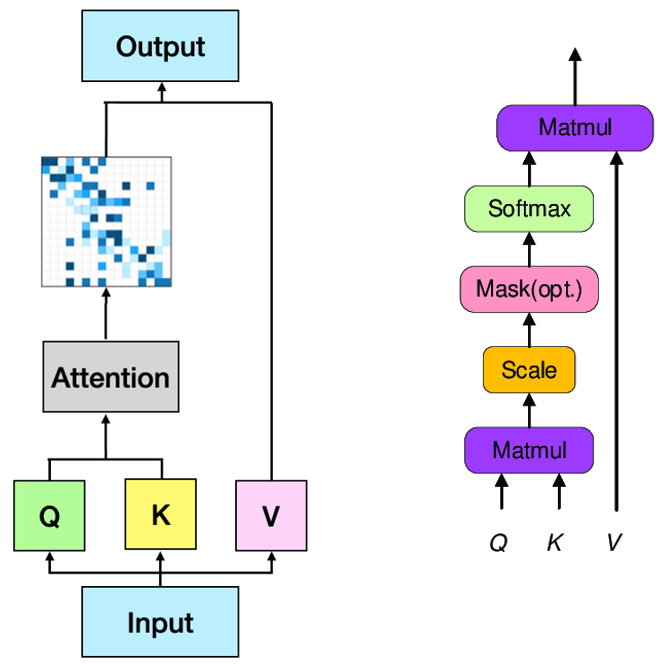

---
# 注意スコアの活用プロセス

## 基本的な考え方

* 文章の中の各単語が他の単語とどれだけ関係があるか調べる
* 例文：「私は美味しいケーキを食べた」
  * 「ケーキ」と「食べた」は強い関連性
  * 「私」と「食べた」も関連性あり
  * 「美味しい」と「ケーキ」も関連性あり

## 3つの大事な要素（検索エンジンの例）

* Q（質問）：調べたい単語
  * 例：Googleで「東京 観光」と検索
* K（検索対象）：どの単語と関連があるか
  * 例：「東京タワー」「浅草寺」などのキーワード
* V（実際の情報）：関連する単語の意味や内容
  * 例：検索結果として表示される情報

## 計算の流れ

1. 単語同士の関連性を計算
   * 例：「ケーキ」と文中の他の全単語を比較
2. 関連性の強さを0から1の間の数値に変換
   * 1に近い = とても関連がある
   * 0に近い = あまり関連がない
3. 関連性の強さに応じて情報を組み合わせる
   * 関連が強い単語の情報をより多く活用

##  実際の使われ方

* 文章の理解
* 機械翻訳
* 質問応答
* 文章生成

- このように、人間が文章を理解する時のように、単語と単語の関係を考えながら処理を行います。
---

---
# まとめ:Transformerの自己注意機構

* 目的：文脈を考慮した単語の意味理解
  * 周辺の単語との関係性を捉える
  * 文脈に応じた単語の表現を生成

## 学習過程での変化

1. 単語の初期表現
   * 基本的な埋め込みベクトル
   * 文脈を考慮していない状態

2. 注意機構による処理
   * 注意スコアの計算
   * 文脈情報の重み付け

3. 最終的な表現
   * 文脈を考慮した新しい埋め込み空間への投影
   * より洗練された単語の表現

## 重要なポイント

* 単語の意味は固定的でなく、文脈に応じて変化
* 学習を通じて文脈理解の能力が向上
* 周囲の単語との関係性を数値的に表現

# 12.3 マルチヘッド注意機構 (Multi-Head Attention)

# マルチヘッド注意機構

* Transformerは複数の自己注意機構を持つ
  * 各機構 = 注意ヘッド（attention head）
  * 全ヘッドの出力の集約 = マルチヘッド注意（multi-head attention）

## モデル別のヘッド数
* オリジナルTransformer：8ヘッド
* LLaMA 3：32ヘッド

### 各ヘッドが異なる文脈的関係を学習し、それらを組み合わせることでより豊かな言語理解を実現します。
---

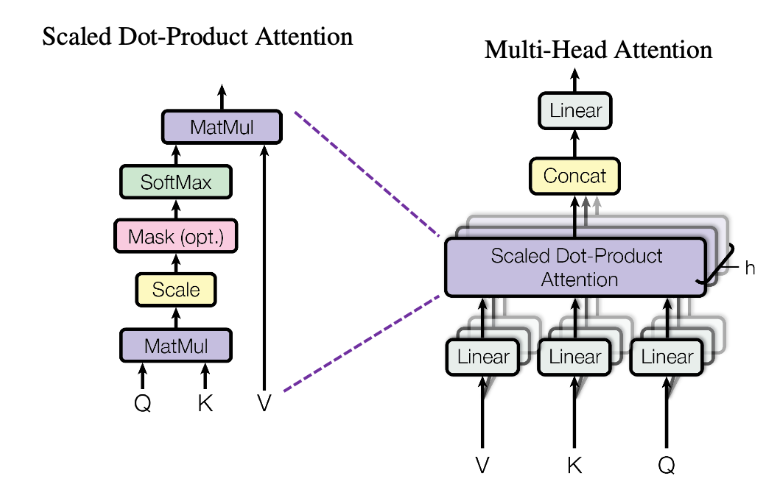

# マルチヘッド注意機構の処理フロー

1. 入力処理
   * 線形層（全結合層）を通過

2. 並列処理
   * 複数の注意ヘッドで同時処理
   * 各ヘッドは独立して動作

3. 出力統合
   * 全ヘッドの出力を連結
   * もう一度線形層を通過

### このシンプルな構造で、異なる視点からの文脈理解を統合します。
---

# なぜ複数の注意ヘッドが必要か？

1. 異なる関係性の学習
   * 各ヘッドが異なるパターンを捉える
   * 例：
     * ヘッド1：名詞と数値の関係
     * ヘッド2：形容詞間の関係
     * ヘッド3：韻を踏む単語の関係

2. 冗長性の利点
   * 一つのヘッドが特定のパターンに特化しても
   * 他のヘッドが補完
   * 全体的な性能が向上

3. 計算効率
   * 各ヘッドは並列処理が可能
   * 学習の高速化
   * モデルの大規模化に貢献

---
# なぜ自然に異なる学習をするのか？

- 自然に異なるパターンを学習する傾向がある

1. 初期化の影響

- 各ヘッドの重み行列は異なる乱数で初期化
- 異なる初期値から学習開始


2. 損失関数の最適化

- モデル全体の性能向上が目標
- 異なる特徴を捉えた方が効率的
- 同じパターンの重複は非効率
---

## 12.4 Encoder Block

---
# エンコーダーブロック（Encoder Block）

* Transformerネットワークの主要構成要素
* 役割：
  * 単語埋め込みを入力として処理
  * テキストデータから特徴表現を抽出
  * 様々なNLPタスクに利用可能な形に変換

- このブロックは、入力テキストから意味のある表現を抽出し、その後の自然言語処理タスクの基礎となります。
---

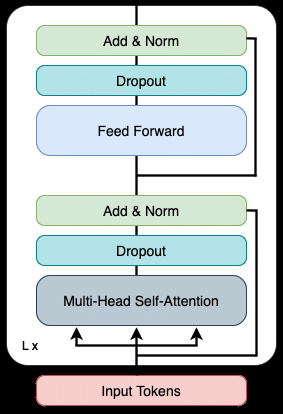

---
# エンコーダーブロックの構成要素

1. マルチヘッド注意層
   * 複数の自己注意機構で構成

2. ドロップアウト層
   * 過学習防止の標準的な層

3. 残差接続（Residual connections）
   * 入力を処理後の出力に加算
   * 勾配消失・爆発問題を緩和
   * `Add`で表現

4. 層正規化（Layer Normalization）
   * 各マルチヘッド注意層の出力を個別に正規化
   * 平均0、標準偏差1に調整
   * `Norm`で表現

5. フィードフォワードネットワーク
   * 2つの全結合層で構成
   * 有用な特徴表現を抽出

## 全体構造
* 複数のエンコーダーブロックを直列接続
* 例：オリジナルTransformerは6ブロック使用
* 利点：
  * 段階的に深い特徴を抽出
  * より複雑な文脈理解が可能に
  * 各ブロックで異なるレベルの抽象化を学習

---
# エンコーダーブロックのKerasでの実装解説

* 基本構造：
  * Kerasの`Layer`クラスを継承
  * カスタムレイヤーとして実装

## 主要なメソッド

1. `__init__()`：初期化メソッド
   * 各層の定義を行う
   * パラメータ：
     * `num_heads`：注意ヘッドの数
     * `key_dim`：埋め込みの次元
     * `ff_dim`：フィードフォワード層のニューロン数
     * `embed_dim`：出力の次元

2. `call()`：順伝播の処理
   * 入力：
     * `inputs`：入力埋め込み
     * `training`：学習モードかどうか
        * True：ドロップアウトを適用
        * False：ドロップアウトを適用しない

## 層の構成

* マルチヘッド注意層：Kerasの組み込み層
* ドロップアウト層：dropout_rateで制御
* 正規化層：epsilonで数値の安定性を確保
* フィードフォワード：2つの全結合層

# 特徴的な点
* 残差接続：入力を出力に加算
* self-attentionでは`inputs`を2回使用（keyとvalueとして）
---

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import MultiHeadAttention, LayerNormalization, Dropout, Dense, Embedding, Layer
from keras.layers import Input, GlobalAveragePooling1D
from keras.optimizers import Adam
from keras import Sequential, Model

In [ ]:
class TransformerEncoder(Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super().__init__()
        self.multi_head_attention = MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.feed_forward_net = Sequential([Dense(ff_dim, activation="relu"), Dense(embed_dim),])
        self.layer_normalization1 = LayerNormalization(epsilon=1e-6)
        self.layer_normalization2 = LayerNormalization(epsilon=1e-6)
        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)

    def call(self, inputs, training):
        multi_head_att_output = self.multi_head_attention(inputs, inputs)
        multi_head_att_dropout = self.dropout1(multi_head_att_output, training=training)
        add_norm_output_1 = self.layer_normalization1(inputs + multi_head_att_dropout)
        feed_forward_output = self.feed_forward_net(add_norm_output_1)
        feed_forward_dropout = self.dropout2(feed_forward_output, training=training)
        add_norm_output_2 = self.layer_normalization2(add_norm_output_1 + feed_forward_dropout)
        return add_norm_output_2

# 12.5 位置エンコーディング (Positional Encoding)

# 位置エンコーディングの必要性

* 問題：
  * 単語の埋め込みだけでは順序情報が失われる
  * 文の意味は単語の順序に依存
  * 例：「犬が猫を追う」≠「猫が犬を追う」

## 解決方法

* 各単語の埋め込みベクトルに位置情報を追加
  * 単語埋め込み + 位置エンコーディング
  * 位置に応じた固有の情報を付加

このように、位置エンコーディングによって単語の順序情報をTransformerに伝えることができます。

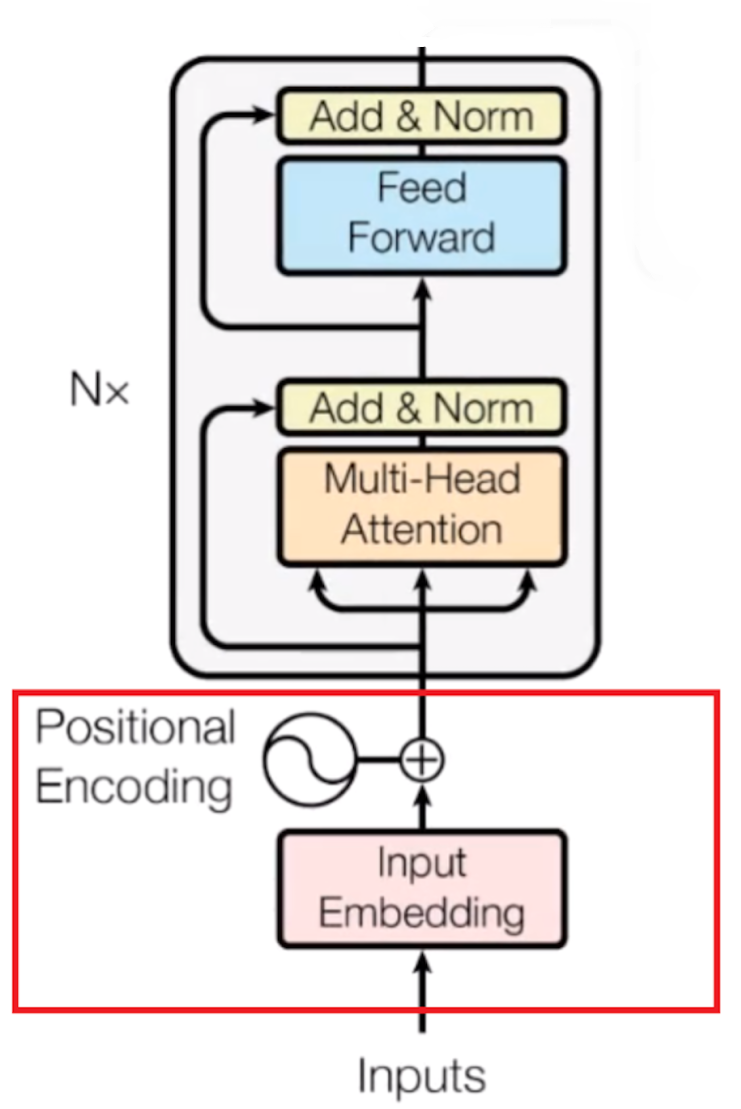

---
# 位置エンコーディングの実装方法

1. サイン・コサインによる方法（sinusoidal positional encoding）
   * オリジナルのTransformer論文の手法
   * 特徴：
     * 単語埋め込みと同じサイズのベクトル
     * サイン・コサイン関数で位置ベクトルを生成
     * -1から1の範囲にスケーリング
     * 各位置に一意なベクトルを対応付け

2. 学習による方法（learned positional encodings）
   * 位置表現を学習により獲得
   * Kerasでの実装：
     * 単語と位置の両方に`Embedding`層を使用
     * パラメータ：
       * 単語埋め込み：input_dim = vocab_size
       * 位置埋め込み：input_dim = maxlen
       * 両方とも：output_dim = 埋め込みの次元数

* `call`メソッドの処理：
  1. 入力シーケンスの長さを`maxlen`として取得
  2. `tf.range`で位置の数値列を生成（NumPyのlinspaceに類似）
  3. 2つの`Embedding`層を適用
  4. 単語埋め込みと位置埋め込みを加算して返す
---

In [ ]:
class TokenAndPositionEmbedding(Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super().__init__()
        self.token_embeddings = Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.positional_embeddings = Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, inputs):
        maxlen = tf.shape(inputs)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        position_embeddings = self.positional_embeddings(positions)
        input_embeddings = self.token_embeddings(inputs)
        return input_embeddings + position_embeddings

## 12.6 Transformerモデルを分類問題に応用

---
# 分類用Transformerモデルの構造

1. エンコーダー部分
   * Input層：入力シーケンスの最大長を定義
   * TokenAndPositionEmbedding層：単語と位置の埋め込み
   * TransformerEncoder層：文脈の理解

2. 分類器部分
   * GlobalAveragePooling1D層：
     * 各単語の平均値を計算
   * Dropout層とDense層：
     * 2セット構成
     * テキストシーケンスの分類を実行

### この構造により、テキストの分類タスクを実行できます。
---

In [ ]:
maxlen = 200  # Maximum length of input sequences is 200 words
embed_dim = 32  # Embedding size for each token
num_heads = 2  # Number of attention heads
ff_dim = 32  # Dense layer size in the feed forward network inside transformer
vocab_size = 20000  # The size of the vocabulary is 20k words

# encoder
inputs = Input(shape=(maxlen,))
embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)(inputs)
x = TransformerEncoder(embed_dim, num_heads, ff_dim)(embedding_layer, training=True)

# classifier
x = GlobalAveragePooling1D()(x)
x = Dropout(0.1)(x)
x = Dense(100, activation="relu")(x)
x = Dropout(0.1)(x)
outputs = Dense(1, activation="sigmoid")(x)

model = Model(inputs=inputs, outputs=outputs)

The summary of the model is shown below.

In [ ]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ token_and_position_embedding_1       │ (None, 200, 32)             │         646,400 │
│ (TokenAndPositionEmbedding)          │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ transformer_encoder_1                │ (None, 200, 32)             │          10,656 │
│ (TransformerEncoder)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_1           │ (None, 32)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 100)                 │           3,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 660,457 (2.52 MB)

 Trainable params: 660,457 (2.52 MB)

 Non-trainable params: 0 (0.00 B)

# IMDBデータセットの活用

* 目的：映画レビューの感情分析
* データ：Kerasのデータセット
  * 学習データ：25,000シーケンス
  * 検証データ：25,000シーケンス

これらのデータを使用して、映画レビューがポジティブかネガティブかを分類するモデルを作成していくことになります。

In [ ]:
from keras.preprocessing.sequence import pad_sequences

(x_train, y_train), (x_val, y_val) = keras.datasets.imdb.load_data(num_words=vocab_size)
print(len(x_train), "Training sequences")
print(len(x_val), "Validation sequences")
x_train = pad_sequences(x_train, maxlen=maxlen)
x_val = pad_sequences(x_val, maxlen=maxlen)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
25000 Training sequences
25000 Validation sequences


### モデル学習

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss="binary_crossentropy", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.5741 - loss: 0.6756 - val_accuracy: 0.8104 - val_loss: 0.4581
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8447 - loss: 0.3823 - val_accuracy: 0.8620 - val_loss: 0.3175
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9064 - loss: 0.2435 - val_accuracy: 0.8481 - val_loss: 0.3491
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9280 - loss: 0.1887 - val_accuracy: 0.8579 - val_loss: 0.3426
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9466 - loss: 0.1562 - val_accuracy: 0.8538 - val_loss: 0.3833
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9537 - loss: 0.1368 - val_accuracy: 0.8679 - val_loss: 0.3506
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9700 - loss: 0.0979 - val_accuracy: 0.8696 - val_loss: 0.3795
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9693 - loss: 0.0945 - val_accuracy:

### モデル評価

これはモデルの評価段階を示しています。

* 検証データセットでモデルの精度を評価
* 具体的には：
  * 25,000件の検証データで正確性を測定
  * モデルの汎化性能を確認

In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_val, y_val)
print(f'Test Accuracy: {accuracy:.4f}')

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8621 - loss: 0.4568
Test Accuracy: 0.8598


* 検証データの最初の2つのレビューで予測を実行
  * 予測ラベルと実際のラベル（ground-truth）を比較
  * これにより具体的な予測性能を確認

In [ ]:
# Make prediction on two validation samples
predictions = model.predict(x_val[0:2])
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([[0.05014417],
       [0.99987113]], dtype=float32)

In [ ]:
# Compare to the labels for the two validation samples
y_val[0:2]

array([0, 1])

# IMDBデータセットの構造説明

* データの形式：
  * トークン化（単語分割）済み
  * インデックス化（数値変換）済み

* 実際のテキストを見るには：
  * `word_index`辞書を使用
    * キー：単語
    * 値：インデックス番号
  * 例：
    * 単語A → インデックス1
    * 単語B → インデックス2
    * ...

このように、生のテキストではなく、数値化されたデータとして保存されています。

In [ ]:
print(x_val[0])

[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     1   591   202    14    31     6   717    10    10 18142 10698     5
     4   360     7     4   177  5760   394   354     4   123     9  1035
  1035  1035    10    10    13    92   124    89   

In [ ]:
# Get the word index from the IMDB dataset
word_index = keras.datasets.imdb.get_word_index()

# Display several keys and values from word_index
sorted(word_index.items(), key=lambda x: x[1])[:10]

[('the', 1),
 ('and', 2),
 ('a', 3),
 ('of', 4),
 ('to', 5),
 ('is', 6),
 ('br', 7),
 ('in', 8),
 ('it', 9),
 ('i', 10)]

## 2つのレビューのテキストを表示
  * レビュー1：負の感情（negative）を含む
  * レビュー2：正の感情（positive）を含む

#### word_indexを使って数値から元のテキストに戻すことで、モデルの予測が妥当かどうかを人間が直接確認できます。

In [ ]:
# Function to convert indices to words
def decode_review(sequence):
    """Decodes a sequence of integers back to words."""
    reverse_word_index = {value: key for key, value in word_index.items()}
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in sequence if i > 0])

print('Review 1:', decode_review(x_val[0]))

print('Review 2:', decode_review(x_val[1]))

Review 1: ? please give this one a miss br br kristy swanson and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite lacklustre so all you madison fans give this a miss
Review 2: psychological trickery it's very interesting that robert altman directed this considering the style and structure of his other films still the trademark altman audio style is evident here and there i think what really makes this film work is the brilliant performance by sandy dennis it's definitely one of her darker characters but she plays it so perfectly and convincingly that it's scary michael burns does a good job as the mute young man regular altman player michael murphy has a small part the ? moody set fits the content of the story very well in short this movie is a powerful study of loneliness sexual repression and

## 新しい2つのサンプル文で予測をテスト
  * サンプル1：ポジティブな文章
  * サンプル2：ネガティブな文章
  * 特徴：学習データセットには含まれていない文章

### これにより、モデルが未知のテキストにどれだけ適切に対応できるかを確認します。

In [ ]:
# Sample sentences to evaluate
sample_sentences = ["Excellent movie I loved it great cast performance",
                    "It was a terrible movie horrible script"]

# 新しい文章のトークン化プロセス

* 手順：
  * `word_index`を使用
  * 各単語に対応するインデックスを割り当て

* 例：
  * 「excellent」→ インデックス318

このように、新しい文章も学習データと同じ形式（インデックス化されたシーケンス）に変換して、モデルに入力します。

In [ ]:
# Tokenize the sample sentences by converting words to indices using word_index
def encode_review(review):
    return [word_index.get(word) for word in review.lower().split()]

# Encode the sample sentences
sample_sentences_encoded = [encode_review(sentence) for sentence in sample_sentences]
sample_sentences_encoded

[[318, 17, 10, 444, 9, 84, 174, 236], [9, 13, 3, 391, 17, 524, 226]]

In [ ]:
word_index['excellent']

318

* パディング処理：
  * トークン化された文章を固定長に調整

* 予測結果：
  * 文章1：ポジティブと予測
  * 文章2：ネガティブと予測

このように、新しい文章も適切に感情分析できることが確認できました。

In [ ]:
# Pad the sequences
sample_sentences_padded = pad_sequences(sample_sentences_encoded, maxlen=200)

# Make predictions
predictions = model.predict(sample_sentences_padded)
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


array([[0.8552648],
       [0.672921 ]], dtype=float32)

## 12.7 デコーダー・サブネットワーク (Decoder Sub-network)

# Transformerの機械翻訳アーキテクチャ

* オリジナルの目的：機械翻訳
* モデルの種類：シーケンス対シーケンスモデル（seq2seq）
  * 入力：文章
  * 出力：文章

# 主な応用分野
* 機械翻訳
* 質問応答
* テキスト要約
* 対話生成

# アーキテクチャの2つの主要部分

1. エンコーダー部
   * 入力：元の言語の文章
   * 役割：テキストデータの特徴を抽出

2. デコーダー部
   * 入力：
     * 目標言語の文章
     * エンコーダーからの中間表現
   * 役割：次の単語を予測

例：
* 入力（仏）：「Je suis etudiant」
* 出力（英）：「I am a student」
* 処理：1単語ずつ順番に生成

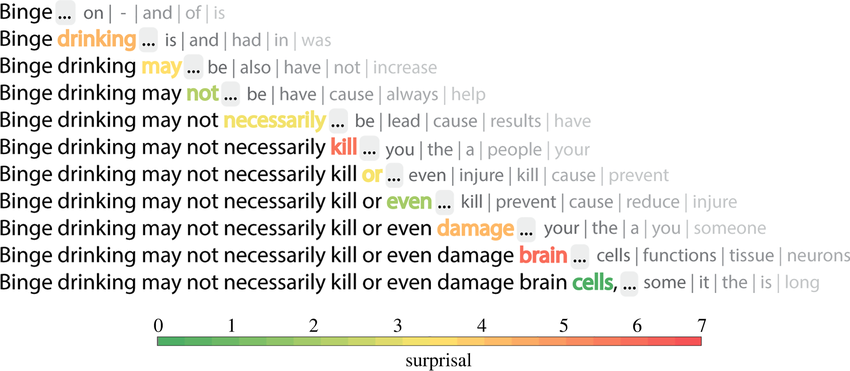

# 自己回帰（autoregressive）モデルとは

* 特徴：
  * 過去の値に基づいて未来を予測
  * 現在の値は過去の値に依存すると仮定

# テキスト生成の仕組み

* 処理手順：
  1. 最初の単語を生成（例：「Binge」）
  2. 次の単語の確率を計算（on, and, of, is...）
  3. 最も適切な単語を選択（例：「drinking」）
  4. 「Binge drinking」を入力に次の単語を生成
  5. これを繰り返す

# 課題

* 計算コストが高い
  * 新しい単語を生成するたび
  * 過去の全単語を評価
  * 多くの時間とリソースが必要

このアプローチはチャットボットの応答生成などに使用されます。

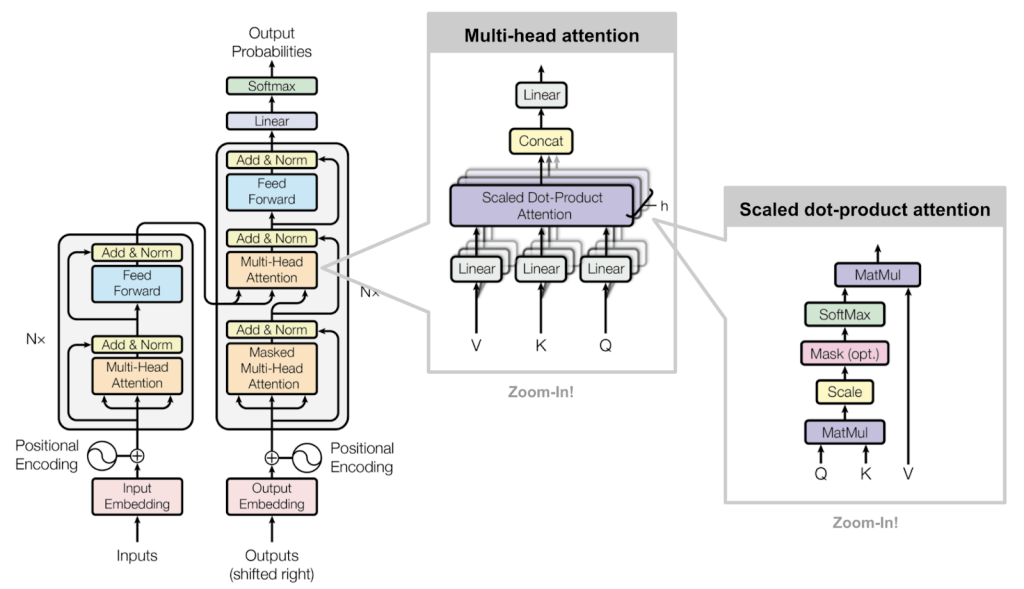

# デコーダーの構造

* エンコーダーと類似の上部構造：
  1. マルチヘッド注意機構
  2. 残差接続
  3. 層正規化
  4. フィードフォワードネットワーク

# エンコーダーとの主な違い

* マスク付きマルチヘッド注意機構
  * 位置：デコーダーの下部
  * 役割：未来の単語を隠す

# マスキングの仕組み

* 例：4番目の単語を予測する場合
  * 使用可能：1-3番目の単語
  * マスク（隠蔽）：4番目以降の単語
* 目的：
  * モデルが未来の単語を「覗き見」できないようにする
  * 現実的な予測タスクを実現

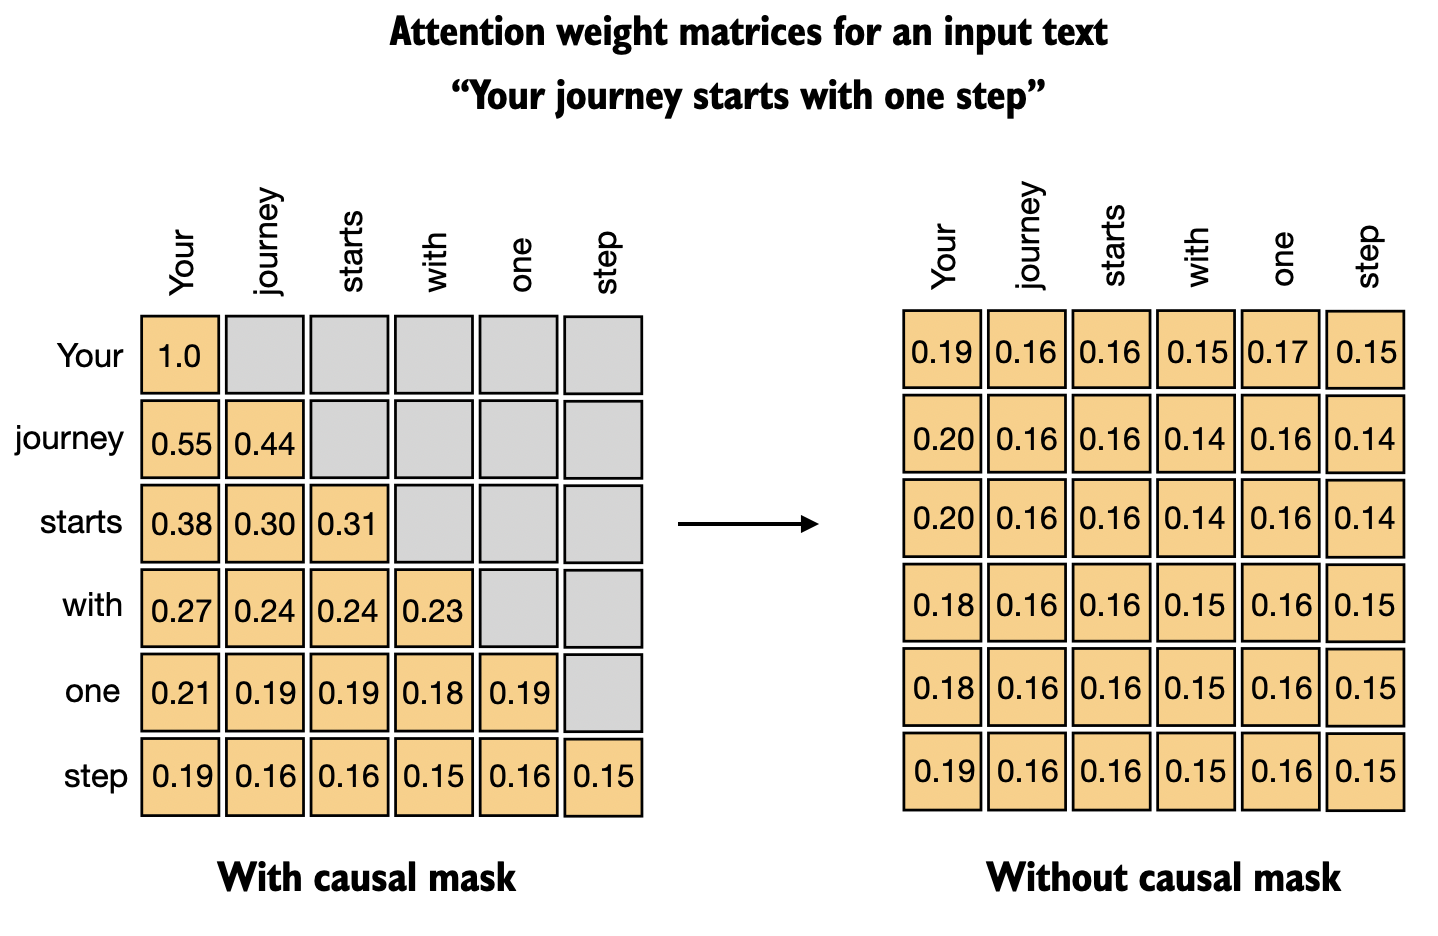

# Transformerのデコーダー構造

1. 入力の特徴
   * 右にシフトした出力を使用
   * 予測時は既知の単語のみ使用

2. 出力処理
   * デコーダー → 全結合層 → softmax層
   * 次の単語の確率を出力

3. 構造の特徴
   * エンコーダー・デコーダーともに6ブロック
   * RNNと比べて：
     * 文章全体を同時処理
     * 並列計算が可能
     * より強力な文脈理解

## 20.8 Vision Transformers <a name='20.8-vision-transformers'></a>

# Vision Transformer (ViT)

* 2021年に提案：
  * Transformerを画像処理に応用
  * NLPのTransformerと類似構造

# 画像処理の工夫

* 問題：画像は空間データ
* 解決策：
  * 画像を16x16のパッチに分割
  * 各パッチを1つのトークンとして扱う

# 処理の流れ

1. パッチ処理
   * パッチを1次元ベクトルに変換
   * 密層で低次元の埋め込みに変換

2. 情報の追加
   * 位置埋め込み
   * クラス埋め込み

3. エンコーディング
   * 標準的なTransformerエンコーダーで処理
   * オリジナルと同じ構造を使用

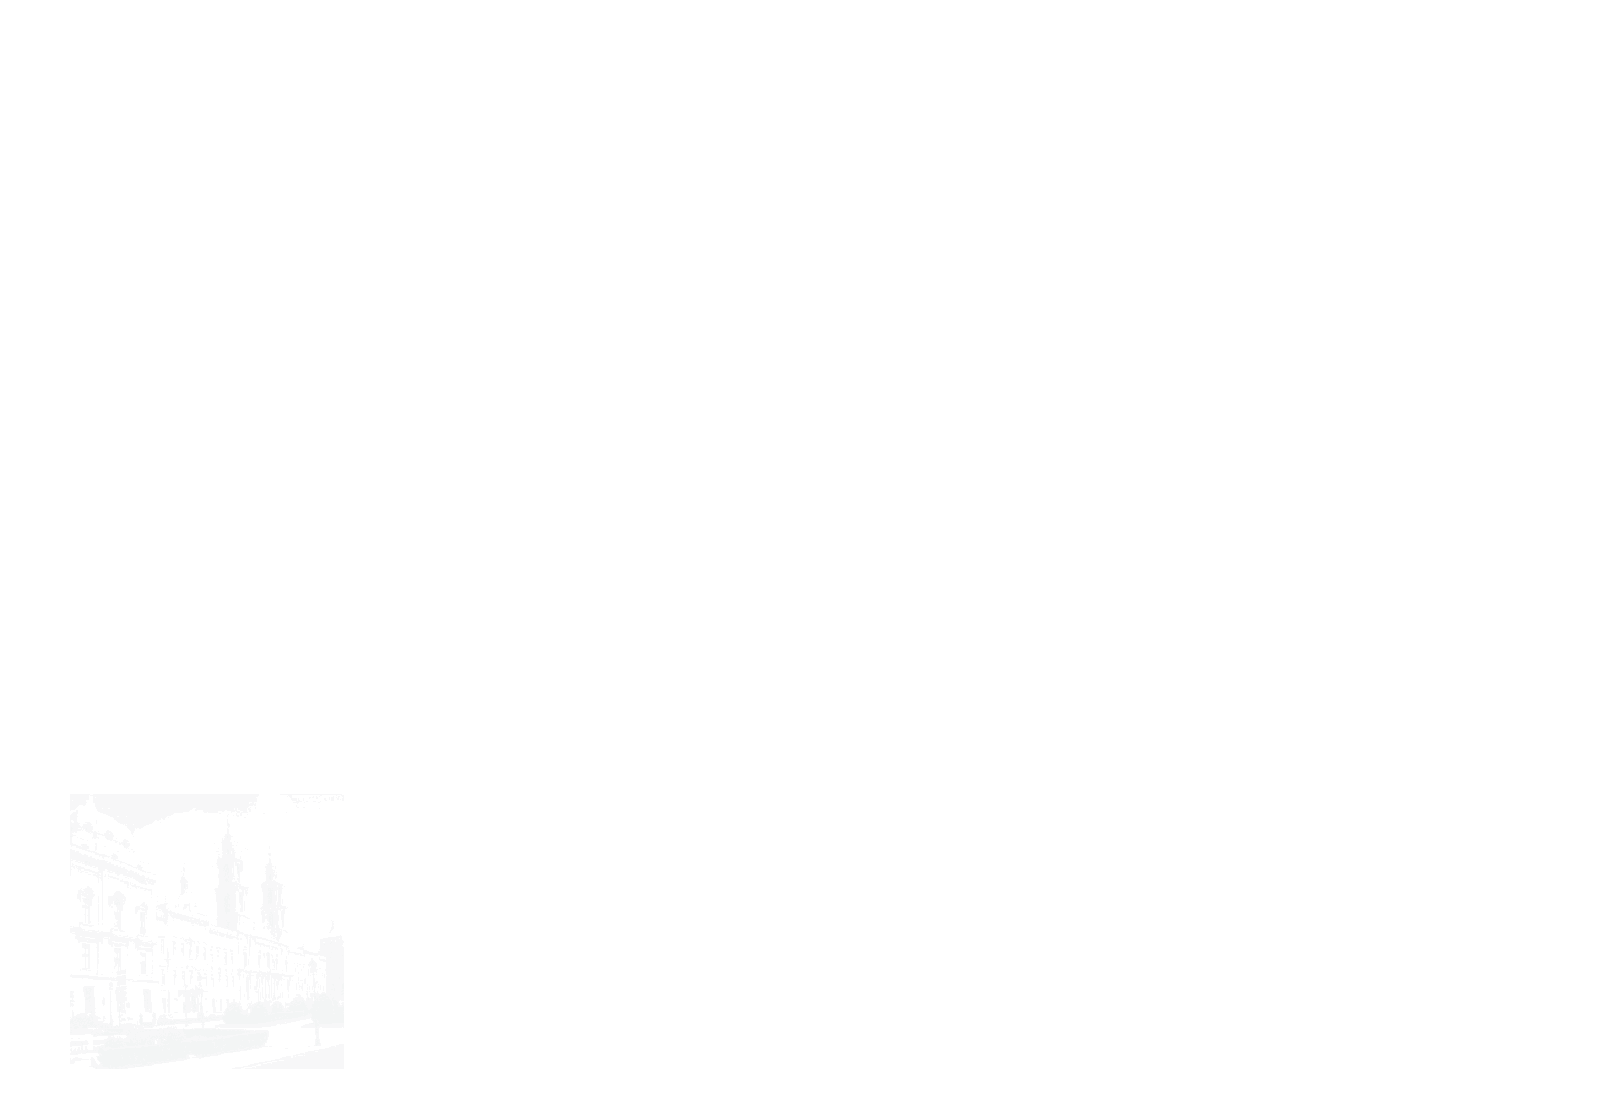

# 様々なVision Transformerモデル

* 新しいバリエーション：
  * MaxViT（Multi-axis ViT）
  * Swin（Shifted Window ViT）
  * DeiT（Data-efficient image Transformer）
  * T2T-ViT（Token-to-token ViT）

# 性能比較

* CNNモデルと比較：
  * EffNet
  * ConvNeXt
  * NFNet
* 結果：ImageNetでより高い精度を達成

このように、Vision Transformerは画像認識タスクでCNNを上回る性能を示しています。

[BACK TO TOP](#top)